In this week, you'll about 
# Transfer Learning.
And Applying to Cats vs Dogs Dataset.

In [2]:
#importing some vital libaries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [3]:
# Using the pre-trained model.
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), # inputshape that model requires
                               include_top=False, # do not include top layers.
                               weights=None) # I do not want the weights.
weights_file_path = 'F:/basic_python/Coursera/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# loading the weights.
pre_trained_model.load_weights(weights_file_path)

# Freezing the all layers.
for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

Note the last layer, it has (None, 3,3 2048).

In [4]:
# Accessing the specific layer.
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)

last layer output shape: (None, 7, 7, 768)


In [9]:
last_output = last_layer.output # last layer output/

Dropout is the reguarization techinque used for avoiding overfitting.

In [11]:
# Flatten the output layer to dimension.
# applying the notion of funtional API.
x = Flatten()(last_output)

# Add a fully connected layer with 1,024 hidden units and ReLU activation.
x = Dense(1024, activation = 'relu')(x)

# Add a dropout rate of 0.2. It will skip 20% precent of neurons.
x = Dropout(0.2)(x)

# Add a final sigmoid layer for classification.
x = Dense(1, activation='sigmoid')(x)

# importing the "model" module,
model = Model(pre_trained_model.input, x)
# compiling the model.
model.compile(optimizer = RMSprop(lr=0.0001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [12]:
# Its time to import the data.
# Augmuenting the images
train_datagen = image.ImageDataGenerator(rescale = 1/255, # Scaling the image.
                                        rotation_range = 40, # rotating the image.
                                        width_shift_range = 0.2, # shifting the width of the image.
                                        height_shift_range = 0.2, # shifting the heigth of the image.
                                        shear_range = 0.2, # compressing the image.
                                        zoom_range =0.2, # zooming in the image by 20 percent.
                                        horizontal_flip=True # flipping the image horizontally.
                                        )
test_datagen = image.ImageDataGenerator(rescale = 1.0/ 255.0)

# Flow training images in batches of  using train_datagen generator.
training_images_path = 'F:/basic_python/Coursera/dataset/train_images'
train_generator = train_datagen.flow_from_directory(training_images_path,# training images.
                                                   batch_size = 60, # batch_size.
                                                   class_mode = 'binary', 
                                                   target_size = (150, 150))# requried image size for the model.
validation_images_path = 'F:/basic_python/Coursera/dataset/test_images'
validation_generator = test_datagen.flow_from_directory(validation_images_path,
                                                       batch_size = 40,
                                                        
                                                       class_mode = 'binary',
                                                       target_size=(150, 150))

Found 24818 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


When you are using generator you have to  specify "steps_per_epoch" (for validation data use validation_steps). what it does(see below cell) it should cover 9 times the batch_size (per epoch should cover the batch_size of 60 for about 9 times(for training) and same intution applies for about 5 times (for validation)).

In [14]:
history = model.fit(train_generator, # train data.
                    
                    steps_per_epoch=9, 
                    epochs=20, # training it for 30 epochs.
                    validation_data= validation_generator,
                    validation_steps=5,
                    verbose=1) # I need the progess bar.

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 9 steps, validate for 5 steps
Epoch 1/20
9/9 [==============================] - 178s 20s/step - loss: 0.8439 - accuracy: 0.6944 - val_loss: 0.5085 - val_accuracy: 0.7857
Epoch 2/20
9/9 [==============================] - 119s 13s/step - loss: 0.5828 - accuracy: 0.7407 - val_loss: 0.8627 - val_accuracy: 0.7527
Epoch 3/20
4/9 [============>.................] - ETA: 1:00 - loss: 0.4205 - accuracy: 0.8125

D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  " Sk

9/9 [==============================] - 119s 13s/step - loss: 0.4143 - accuracy: 0.8185 - val_loss: 0.1621 - val_accuracy: 0.9286
Epoch 4/20
9/9 [==============================] - 114s 13s/step - loss: 0.4165 - accuracy: 0.8037 - val_loss: 0.3117 - val_accuracy: 0.8956
Epoch 5/20
9/9 [==============================] - 111s 12s/step - loss: 0.3962 - accuracy: 0.8204 - val_loss: 0.1390 - val_accuracy: 0.9505
Epoch 6/20
9/9 [==============================] - 110s 12s/step - loss: 0.4403 - accuracy: 0.8074 - val_loss: 0.1681 - val_accuracy: 0.9396
Epoch 7/20
9/9 [==============================] - 111s 12s/step - loss: 0.3538 - accuracy: 0.8241 - val_loss: 0.3962 - val_accuracy: 0.8901
Epoch 8/20
3/9 [=========>....................] - ETA: 1:05 - loss: 0.3811 - accuracy: 0.8000

D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


9/9 [==============================] - 108s 12s/step - loss: 0.3144 - accuracy: 0.8481 - val_loss: 0.1344 - val_accuracy: 0.9560
Epoch 9/20
9/9 [==============================] - 113s 13s/step - loss: 0.3506 - accuracy: 0.8296 - val_loss: 0.0972 - val_accuracy: 0.9670
Epoch 10/20
9/9 [==============================] - 111s 12s/step - loss: 0.4423 - accuracy: 0.8019 - val_loss: 0.3085 - val_accuracy: 0.9341
Epoch 11/20
9/9 [==============================] - 111s 12s/step - loss: 0.3537 - accuracy: 0.8296 - val_loss: 0.3167 - val_accuracy: 0.9396
Epoch 12/20
9/9 [==============================] - 109s 12s/step - loss: 0.3518 - accuracy: 0.8481 - val_loss: 0.1809 - val_accuracy: 0.9505
Epoch 13/20
9/9 [==============================] - 109s 12s/step - loss: 0.3387 - accuracy: 0.8481 - val_loss: 0.1934 - val_accuracy: 0.9505
Epoch 14/20
9/9 [==============================] - 115s 13s/step - loss: 0.3028 - accuracy: 0.8741 - val_loss: 0.1941 - val_accuracy: 0.9560
Epoch 15/20
9/9 [=========

D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
D:\New folder\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 422313984 bytes but o

9/9 [==============================] - 118s 13s/step - loss: 0.2993 - accuracy: 0.8704 - val_loss: 0.1519 - val_accuracy: 0.9505
Epoch 17/20
9/9 [==============================] - 112s 12s/step - loss: 0.3153 - accuracy: 0.8537 - val_loss: 0.2130 - val_accuracy: 0.9560
Epoch 18/20
9/9 [==============================] - 110s 12s/step - loss: 0.2638 - accuracy: 0.8926 - val_loss: 0.2462 - val_accuracy: 0.9560
Epoch 19/20
9/9 [==============================] - 110s 12s/step - loss: 0.3524 - accuracy: 0.8556 - val_loss: 0.2283 - val_accuracy: 0.9615
Epoch 20/20
9/9 [==============================] - 108s 12s/step - loss: 0.2764 - accuracy: 0.8704 - val_loss: 0.2407 - val_accuracy: 0.9560


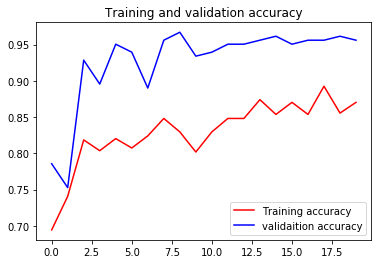

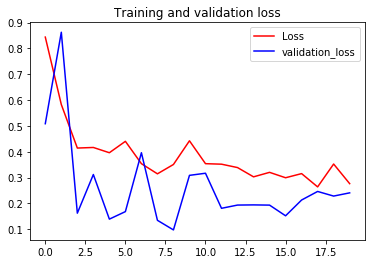

In [16]:
# getting the  accuracy, loss, val_accuracy, val_loss.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # length of the acc will be the no of epochs.

# x-axis = no of epochs, y-axis = accuracy.
plt.plot(epochs, acc, 'r', label= 'Training accuracy') 
plt.plot(epochs, val_acc, 'b', label = 'validaition accuracy')

plt.title('Training and validation accuracy') # title of the graph.
plt.legend() # visualzing the labels.
# plt.figure()

plt.show() # show the graph.

plt.plot(epochs, loss, 'r', label = 'Loss')
plt.plot(epochs, val_loss, 'b', label='validation_loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Notice on the graph, Validation accuracy is surpassing the Training accuracy and Validation loss is lesser than Training Loss.